In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [62]:
  # 1. Load Dataset
df = pd.read_csv("new_creditcard.csv")

# 2. Initial Inspection
print("First few rows of the dataset:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

First few rows of the dataset:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y

In [63]:
# 3. Data Cleaning
# Drop rows with missing target or critical values, or fill them if appropriate
df.dropna(inplace=True)  # or use df.fillna(method='ffill') if needed
print("\nData shape after dropping missing values:", df.shape)





Data shape after dropping missing values: (28638, 12)


In [65]:
# 4. Categorical Data Encoding
# Detect categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Encode with LabelEncoder (can use OneHotEncoder or pd.get_dummies for nominal)
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
print("\nCategorical columns encoded:", categorical_cols)


Categorical columns encoded: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


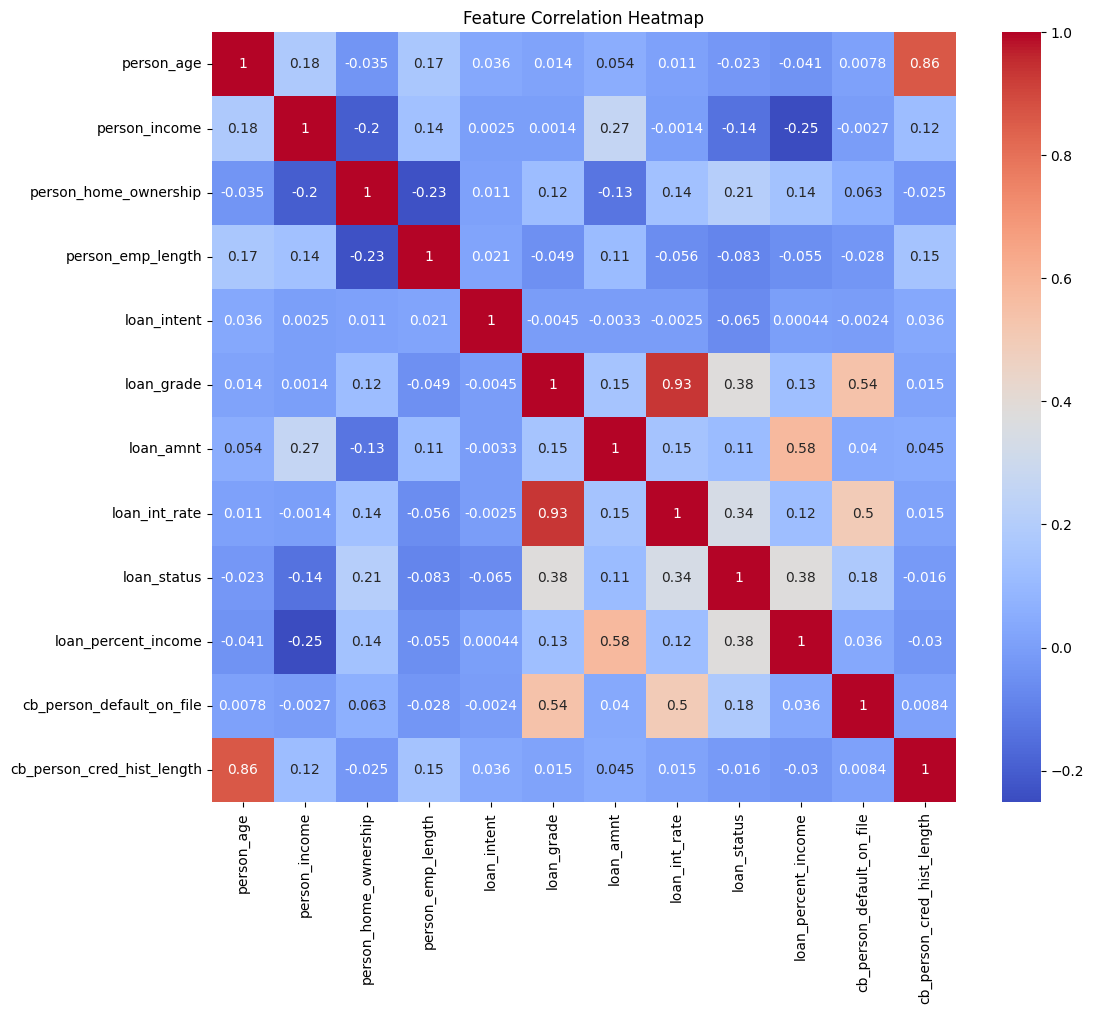

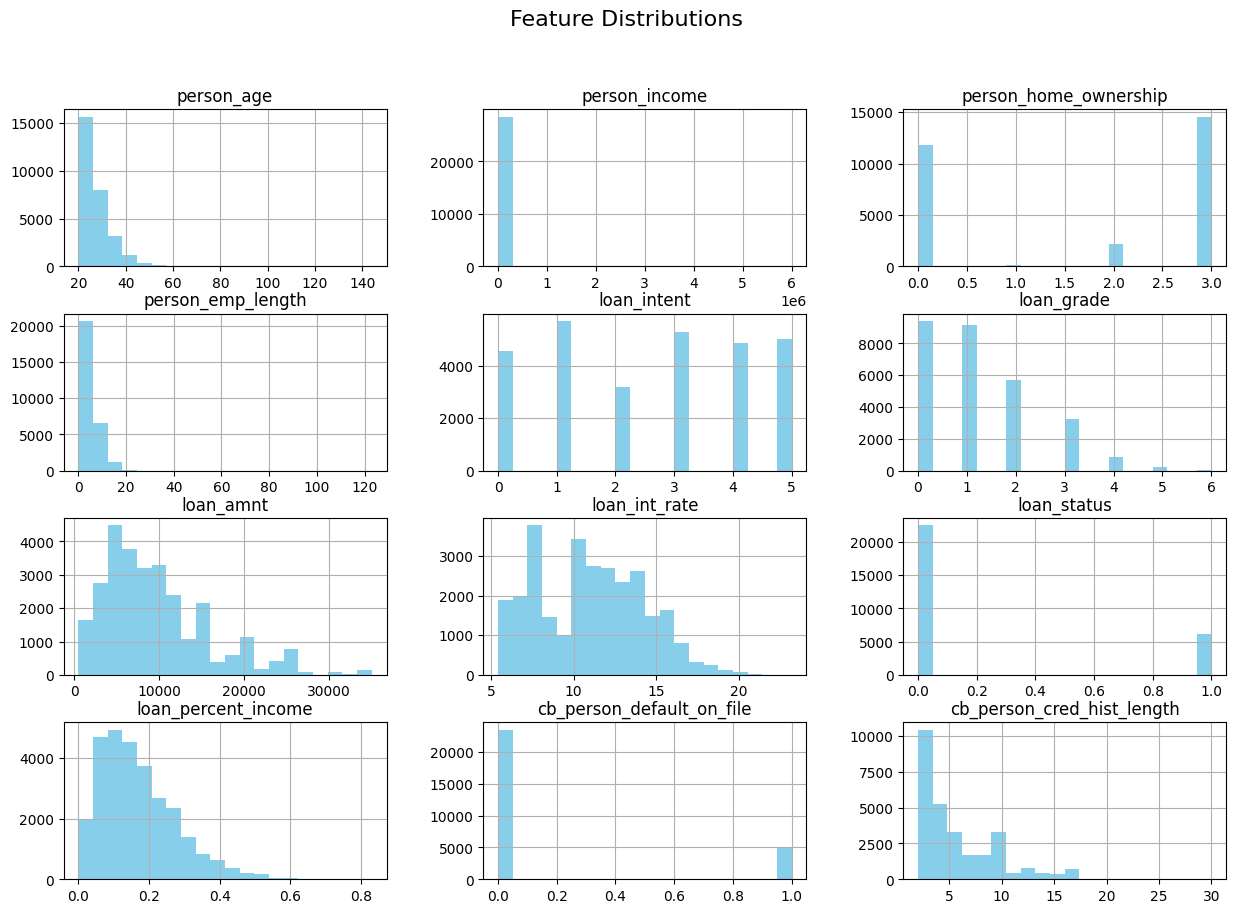

In [66]:
# 5. Exploratory Data Analysis (EDA)
# Plot class distribution
if 'default' in df.columns:
    sns.countplot(x='default', data=df)
    plt.title('Distribution of Credit Risk (Default)')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of numeric features
df.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

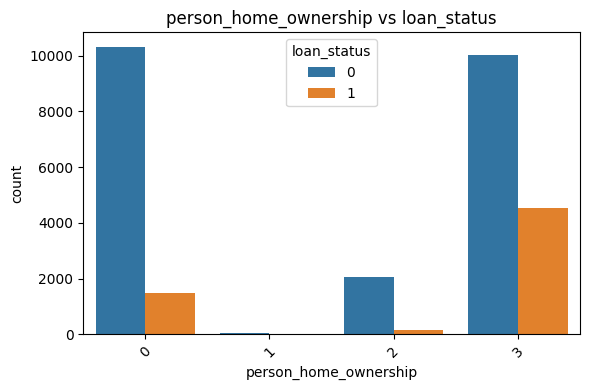

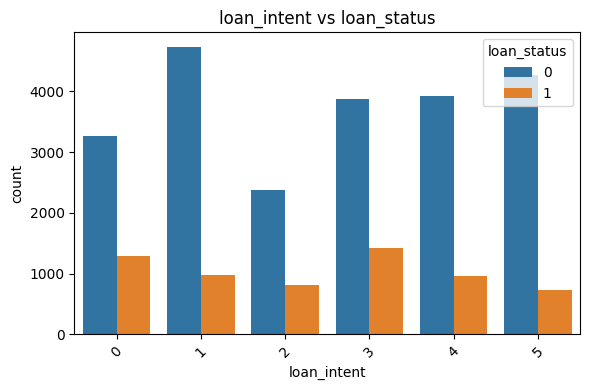

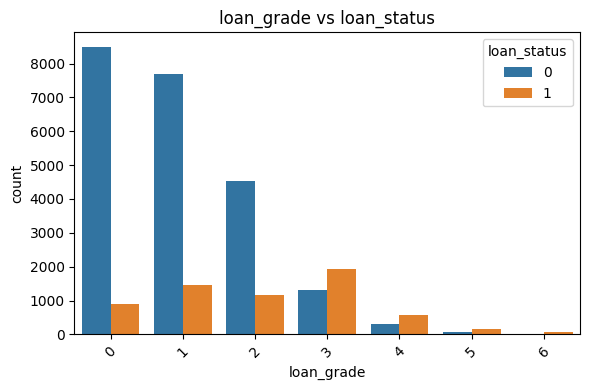

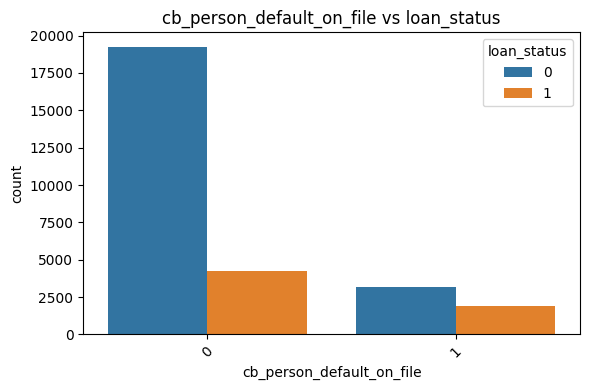

In [69]:
# Additional Visualizations

# . Countplots for categorical features against target
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=target_col, data=df)
    plt.title(f'{col} vs {target_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

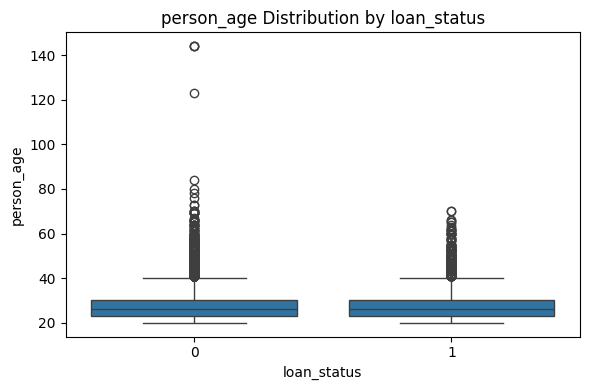

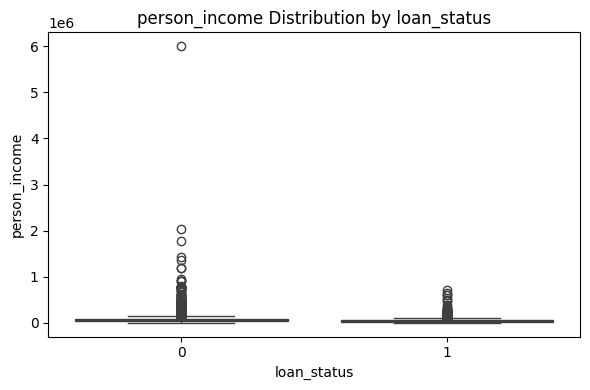

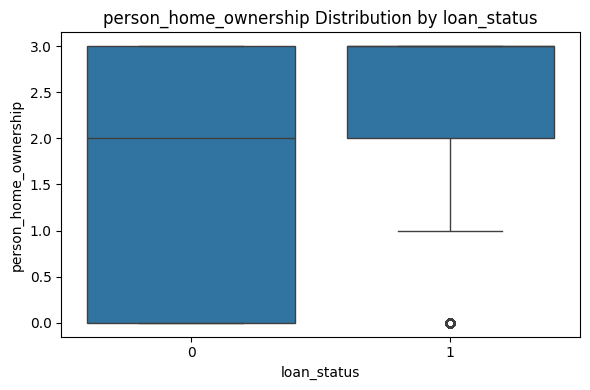

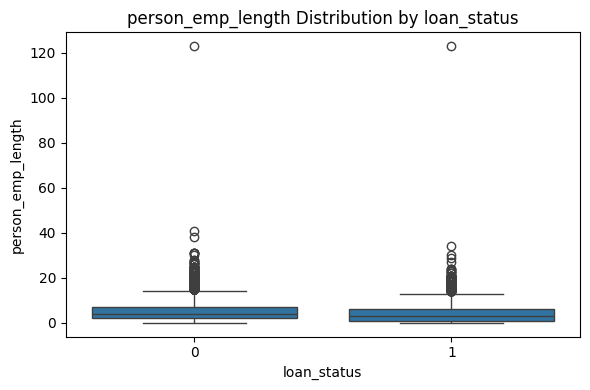

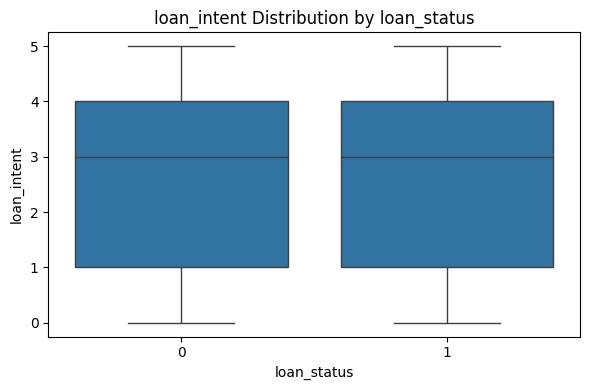

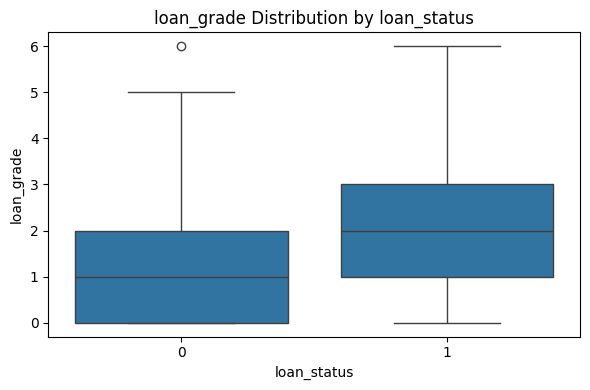

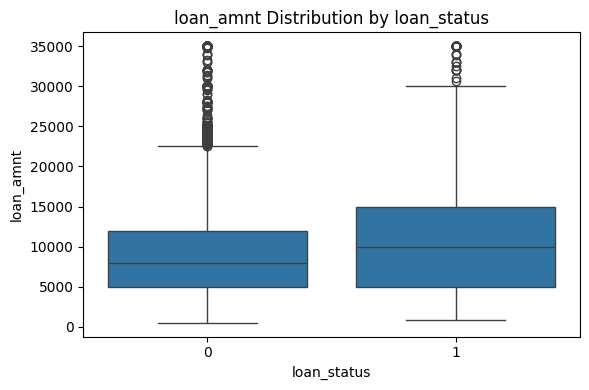

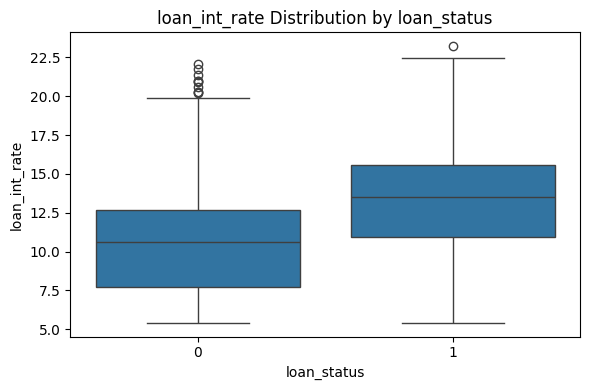

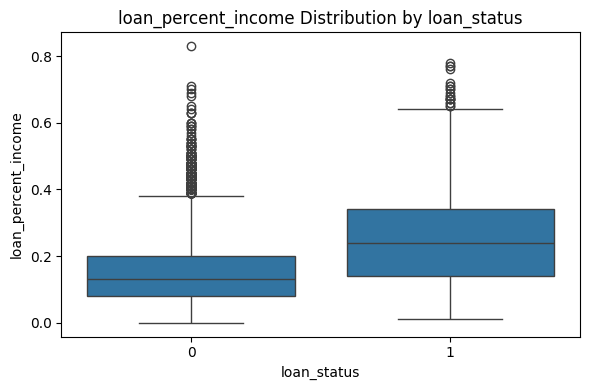

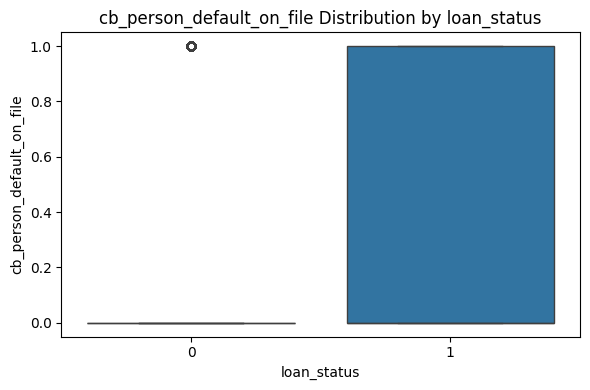

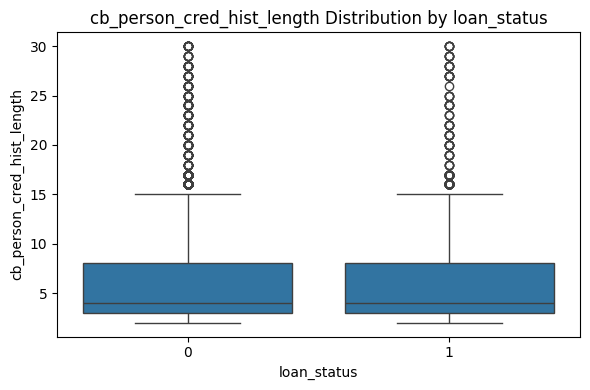

In [71]:
 #2. Boxplots for numerical features grouped by risk (default)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove(target_col)

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f'{col} Distribution by {target_col}')
    plt.tight_layout()
    plt.show()


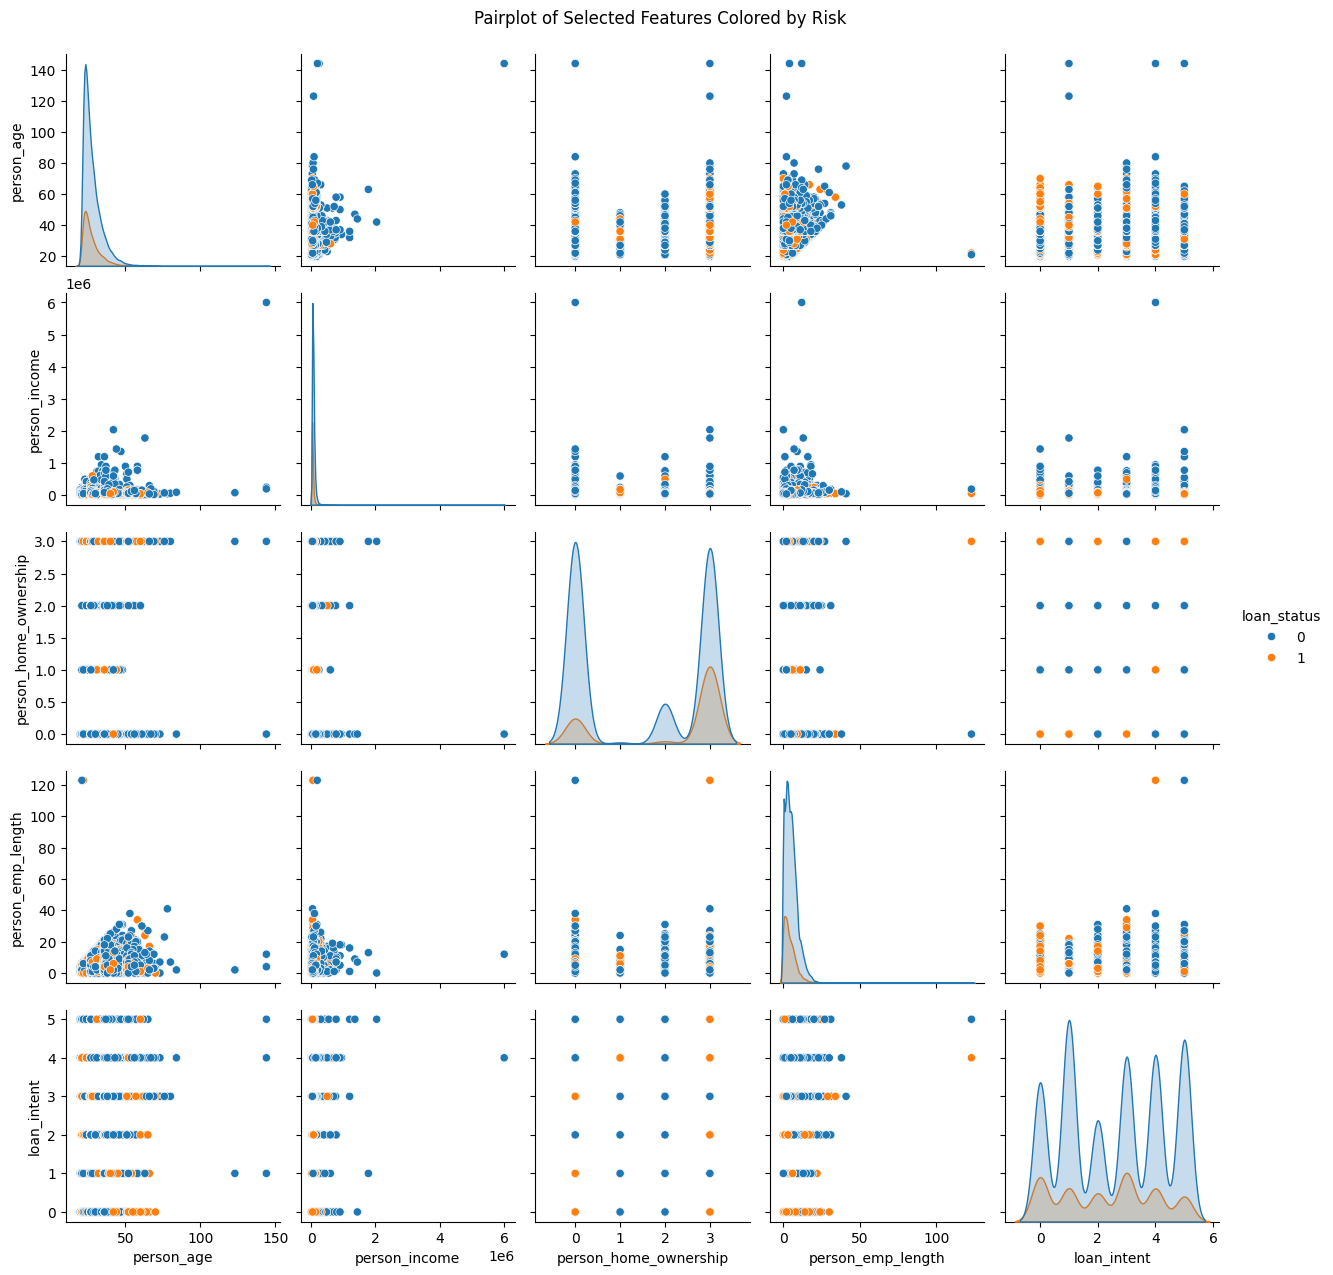

In [72]:
# 3. Pairplot for selected numerical features
selected_features = numerical_cols[:5]  # select a subset to avoid overcrowding
sns.pairplot(df[selected_features + [target_col]], hue=target_col, diag_kind='kde')
plt.suptitle("Pairplot of Selected Features Colored by Risk", y=1.02)
plt.show()

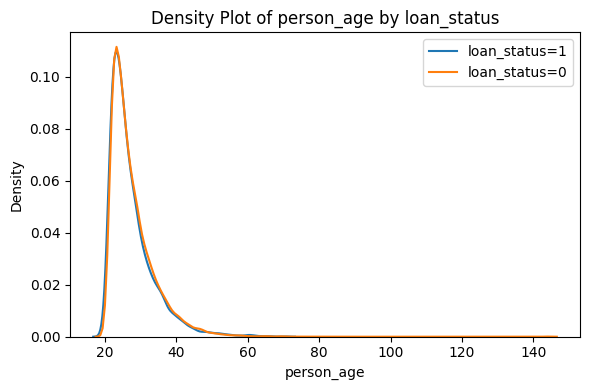

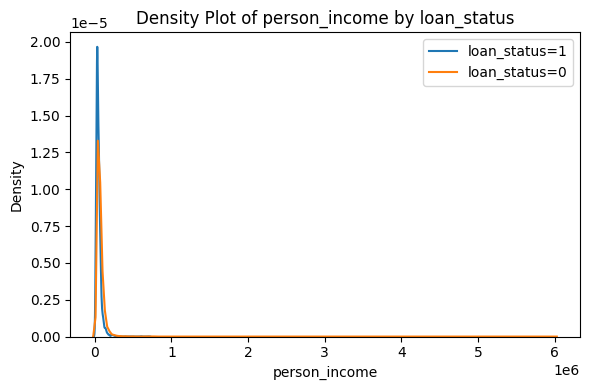

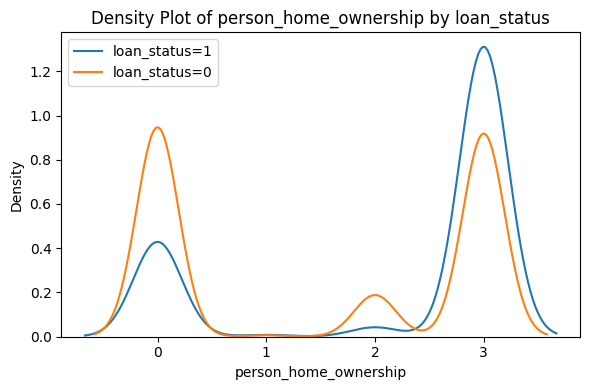

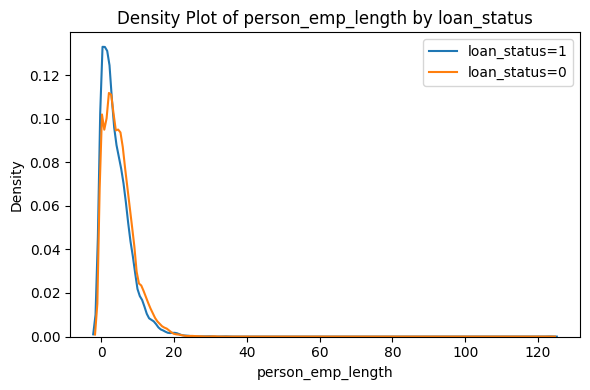

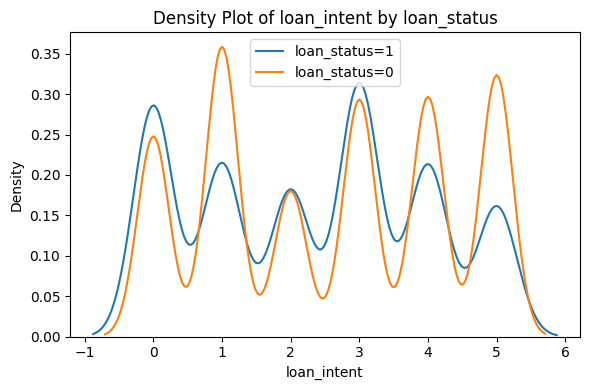

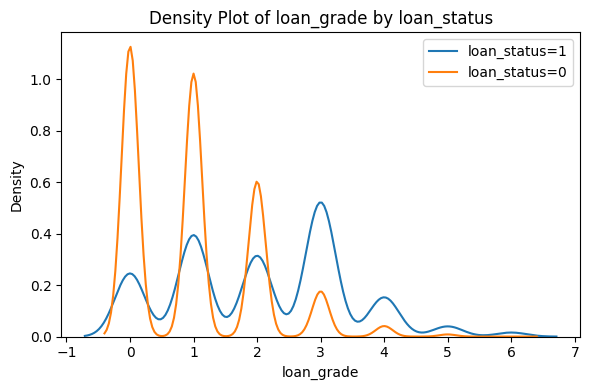

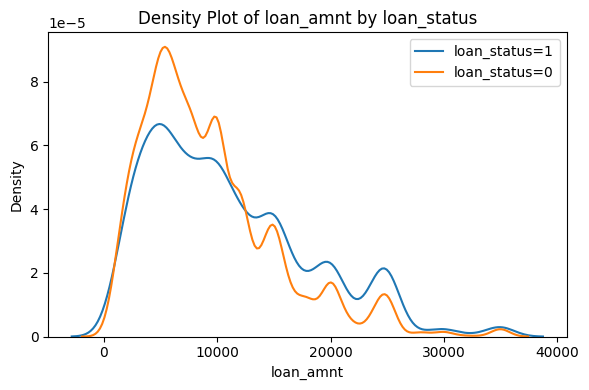

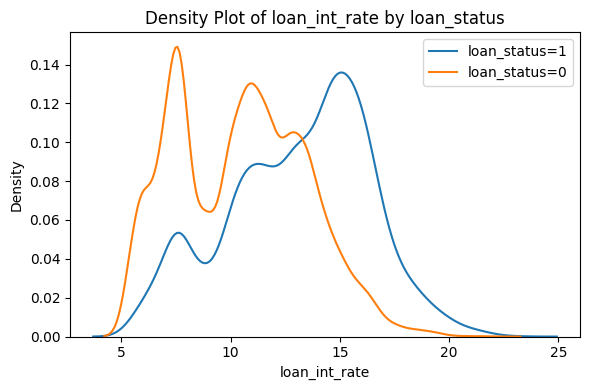

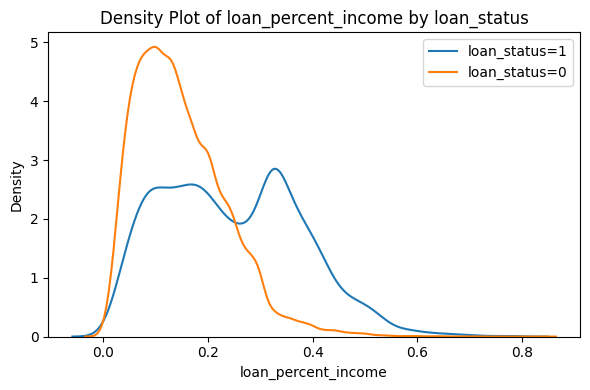

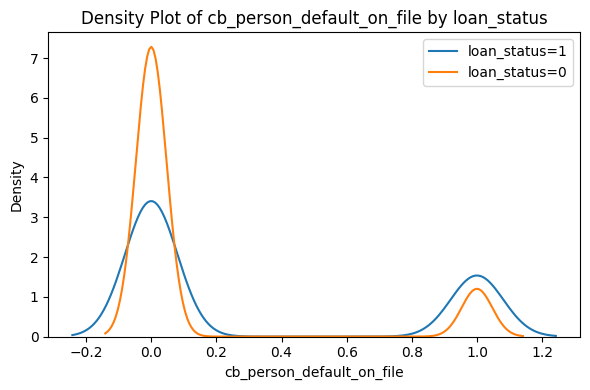

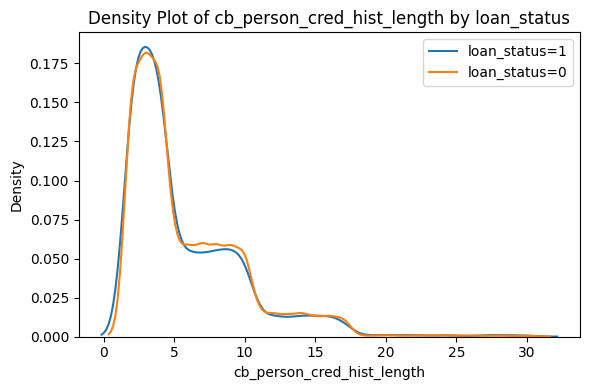

In [73]:
# 4. KDE (Density) plots for each numerical variable
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    for val in df[target_col].unique():
        sns.kdeplot(df[df[target_col] == val][col], label=f'{target_col}={val}')
    plt.title(f'Density Plot of {col} by {target_col}')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

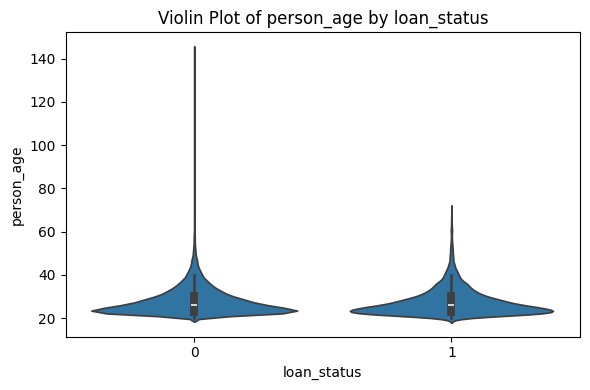

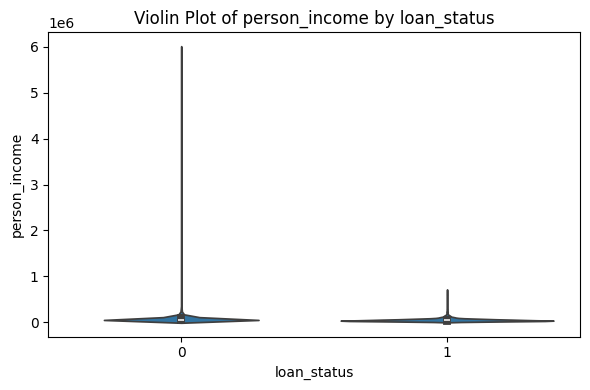

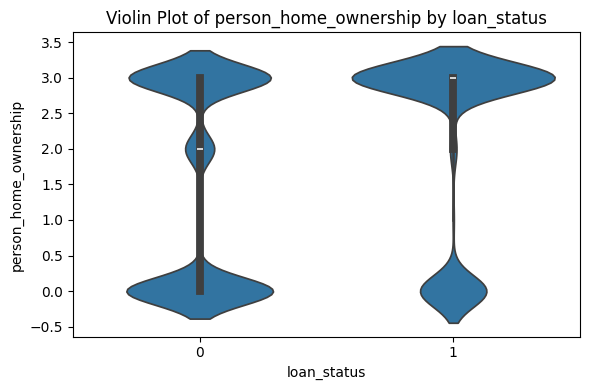

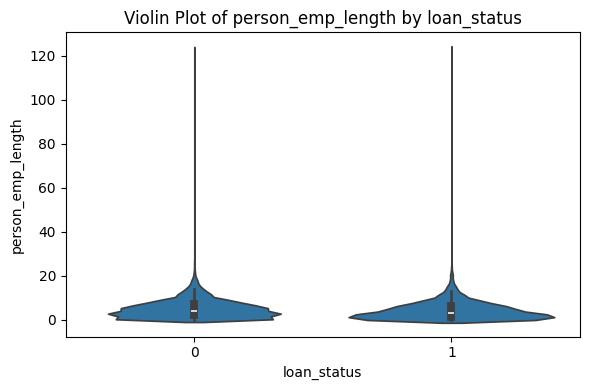

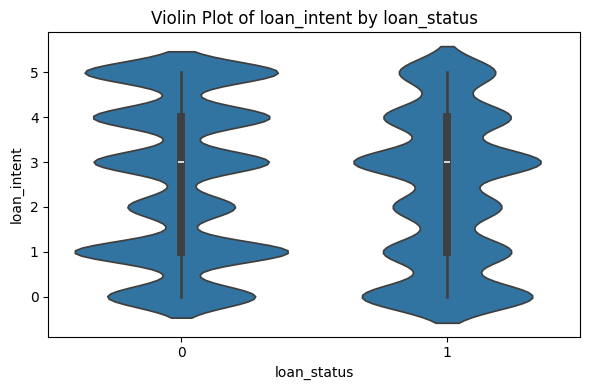

In [74]:
# 5. Violin plots to show distributions and spread
for col in numerical_cols[:5]:  # select a few features
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=target_col, y=col, data=df)
    plt.title(f'Violin Plot of {col} by {target_col}')
    plt.tight_layout()
    plt.show()



<ipython-input-75-008af0e2c125>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.nlargest(10), y=importances.nlargest(10).index, palette='viridis')


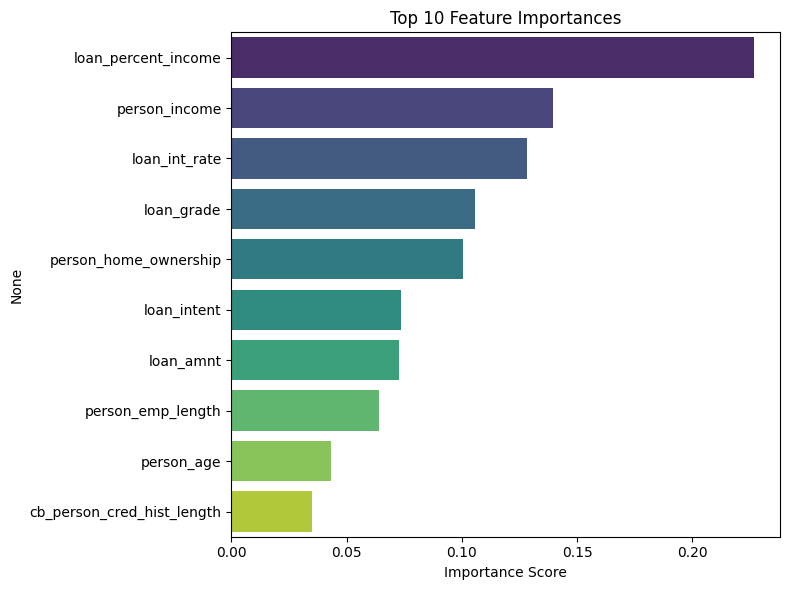

In [75]:
# 6. Feature importance with horizontal bar and colors
plt.figure(figsize=(8, 6))
sns.barplot(x=importances.nlargest(10), y=importances.nlargest(10).index, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

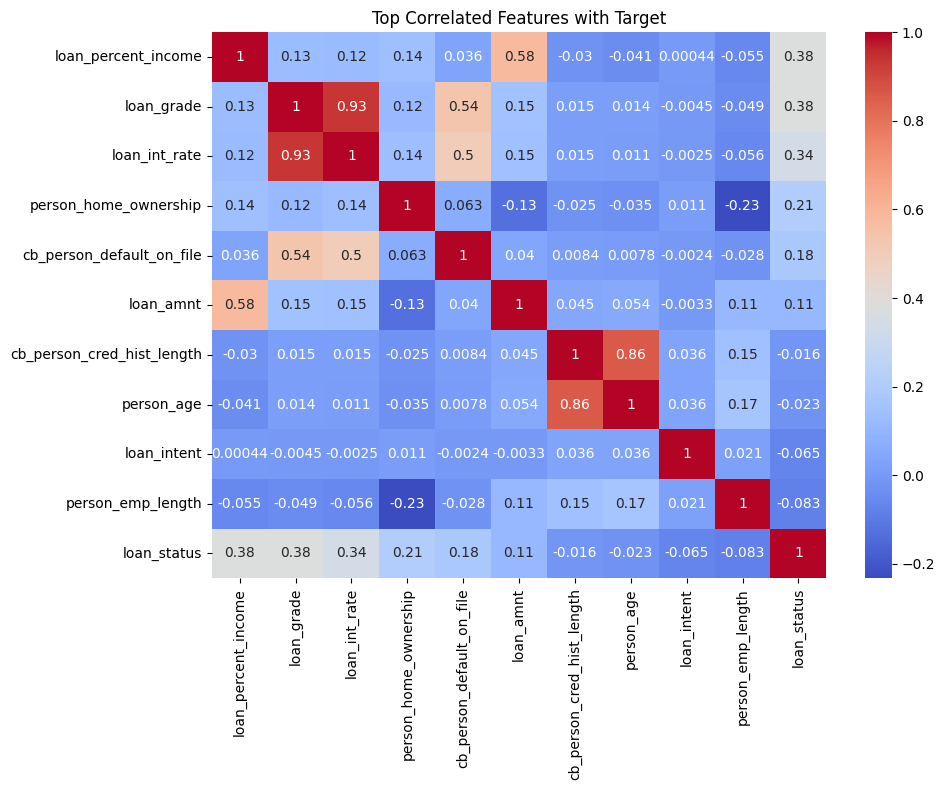

In [76]:
# 7. Heatmap of top correlations with the target
corr_with_target = df.corr()[target_col].drop(target_col).sort_values(ascending=False)
top_corr_features = corr_with_target.head(10).index.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features + [target_col]].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with Target')
plt.tight_layout()
plt.show()


Model Evaluation:
Accuracy: 0.92981843575419
Confusion Matrix:
 [[4420   23]
 [ 379  906]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      4443
           1       0.98      0.71      0.82      1285

    accuracy                           0.93      5728
   macro avg       0.95      0.85      0.89      5728
weighted avg       0.93      0.93      0.93      5728



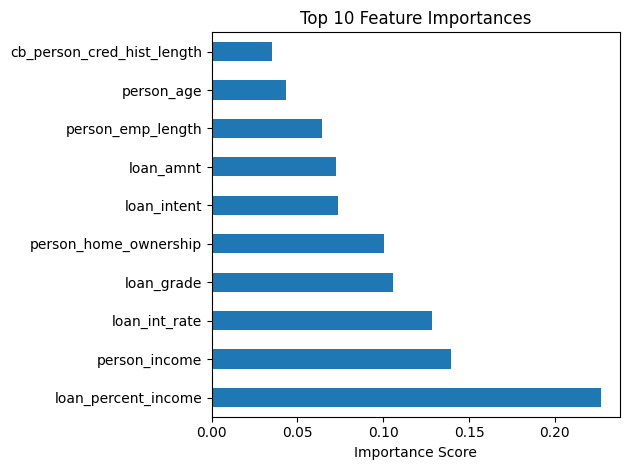

In [68]:
# 6. Model Training
# Define target and features
target_col = 'loan_status'  # change if your target column has a different name
X = df.drop(columns=[target_col])
y = df[target_col]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances')
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()